# Import Libraries

### Pandas 
### Numpy
### Matplotlib
### Seaborn 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Read CSV File

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Decision Tree Regression/Electricity_consumption_dt.csv")
df.head()

,temperature,humidity,wind_speed,appliance_usage,time_of_day,season,electricity_consumption
0,32.483571,72.272738,10.023473,533.262078,Evening,Spring,368.645877
1,29.308678,47.898395,11.054877,510.173721,Night,Summer,331.924362
2,33.238443,64.385793,6.777994,331.922038,Afternoon,Winter,358.191792
3,37.615149,46.299734,8.160204,574.761025,Night,Summer,372.067291
4,28.829233,70.653763,9.703643,385.632870,Night,Winter,359.032716


### Check the Number of Rows And Columns

In [3]:
df.shape

(6500, 7)

### Check the Null values in our DataSet

In [4]:
df.isnull().sum()

temperature                0
humidity                   0
wind_speed                 0
appliance_usage            0
time_of_day                0
season                     0
electricity_consumption    0
dtype: int64

### Check Information about Our Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temperature              6500 non-null   float64
 1   humidity                 6500 non-null   float64
 2   wind_speed               6500 non-null   float64
 3   appliance_usage          6500 non-null   float64
 4   time_of_day              6500 non-null   object 
 5   season                   6500 non-null   object 
 6   electricity_consumption  6500 non-null   float64
dtypes: float64(5), object(2)
memory usage: 355.6+ KB


### Import Label Encoder from sklearn for conversion categorical data into numerical data

In [6]:
from sklearn.preprocessing import LabelEncoder

### Apply the LabelEncoder /Fit the Lable Encoder

In [7]:
le = LabelEncoder()
df["time_of_day"]=le.fit_transform(df["time_of_day"])
df["season"]=le.fit_transform(df["season"])

### Check The sucessfully Conversion 

In [8]:
df.head()

,temperature,humidity,wind_speed,appliance_usage,time_of_day,season,electricity_consumption
0,32.483571,72.272738,10.023473,533.262078,1,1,368.645877
1,29.308678,47.898395,11.054877,510.173721,3,2,331.924362
2,33.238443,64.385793,6.777994,331.922038,0,3,358.191792
3,37.615149,46.299734,8.160204,574.761025,3,2,372.067291
4,28.829233,70.653763,9.703643,385.632870,3,3,359.032716


### Check Statistical Summary of the Dataset

In [9]:
df.describe()

,temperature,humidity,wind_speed,appliance_usage,time_of_day,season,electricity_consumption
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,29.976439,59.949075,10.052360,498.891787,1.472615,1.486154,345.115066
std,4.989346,10.011675,2.015553,98.432212,1.124099,1.121058,36.328903
min,13.793663,20.775997,2.729600,114.362467,0.000000,0.000000,206.563058
25%,26.659482,53.239415,8.683742,430.718191,0.000000,0.000000,320.684279
50%,29.984599,59.895913,10.054665,499.714152,1.000000,1.000000,344.838484
75%,33.301252,66.667373,11.430030,565.493828,2.000000,2.000000,368.612478
max,49.631189,95.290552,18.958169,861.135006,3.000000,3.000000,477.606499


### Check Relationship between the columns

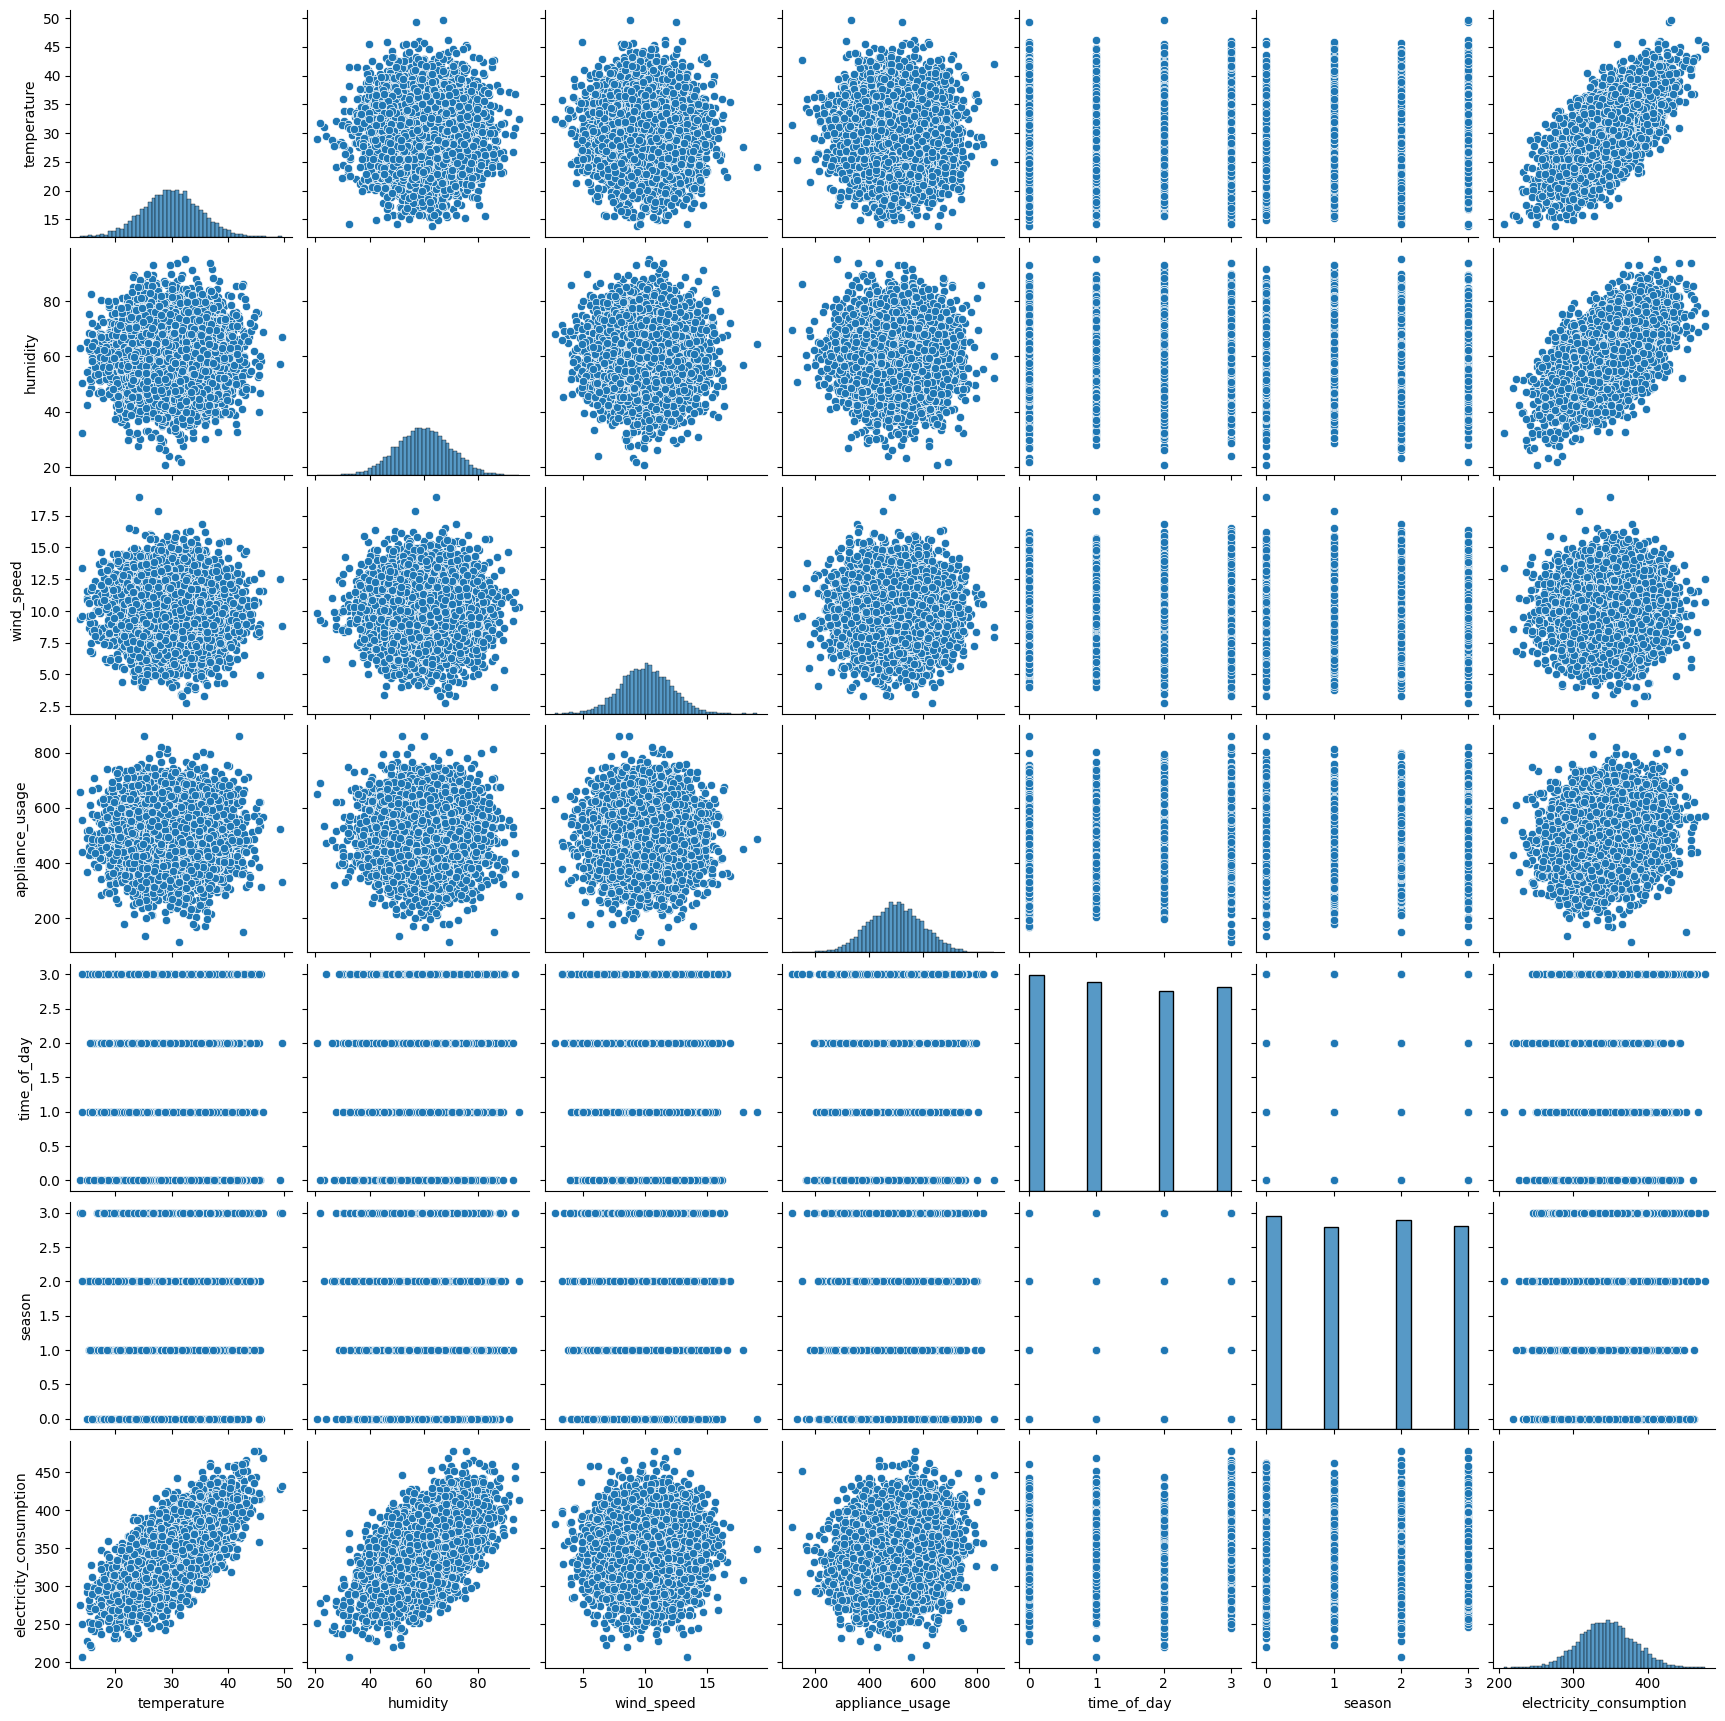

In [10]:
sns.pairplot(data=df)
plt.show()

### Check the co-relation between the columns through heatmap

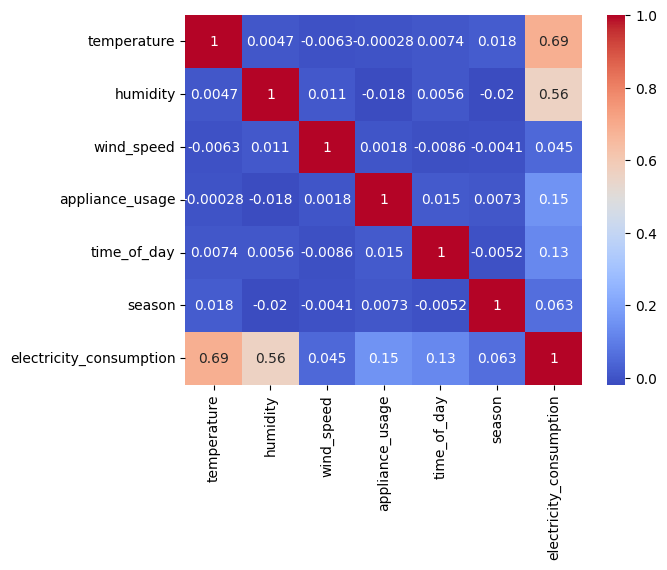

In [11]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

### Split the Data In X and Y (Dependent or Independet Variable)

In [12]:
x=df.iloc[:,:-1]
y=df[["electricity_consumption"]]

### Check the data in X 

In [13]:
x.head()

,temperature,humidity,wind_speed,appliance_usage,time_of_day,season
0,32.483571,72.272738,10.023473,533.262078,1,1
1,29.308678,47.898395,11.054877,510.173721,3,2
2,33.238443,64.385793,6.777994,331.922038,0,3
3,37.615149,46.299734,8.160204,574.761025,3,2
4,28.829233,70.653763,9.703643,385.632870,3,3


### Import StandardScaler from Sklearn for Scalling the Data

In [14]:
from sklearn.preprocessing import StandardScaler

### Apply StandardScaler /Fit the standardScaler

In [15]:
ss = StandardScaler()
x_scaled =pd.DataFrame(ss.fit_transform(x),columns=x.columns)

### Check the scalling data

In [16]:
x_scaled.head()

,temperature,humidity,wind_speed,appliance_usage,time_of_day,season
0,0.502536,1.231024,-0.014333,0.349204,-0.420472,-0.433690
1,-0.133848,-1.203755,0.497429,0.114625,1.358868,0.458394
2,0.653844,0.443188,-1.624674,-1.696422,-1.310142,1.350477
3,1.531122,-1.363447,-0.938850,0.770836,1.358868,0.458394
4,-0.229949,1.069303,-0.173026,-1.150717,1.358868,1.350477


### Import Train Test Split From Sklearn for spliting data in training and testing

In [17]:
from sklearn.model_selection import train_test_split

### Split the data in training and testing 

In [18]:
x_train,x_test,y_train,y_test =train_test_split(x_scaled,y , test_size=0.2 , random_state=42)

### Import DescisionTreeRegression from Sklearn 

In [19]:
from sklearn.tree import DecisionTreeRegressor

### Apply / Fit the model on Dataset

In [20]:
dt = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=9 ,min_samples_split=2)
dt.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


### Check the score ( Accuracy) of the model For the scenario of overfitting
✅ The model shows strong generalization with a training R² of 91.10% and testing R² of 81.71%, indicating no major overfitting.
📊 The performance gap is small, so the model is reliable for real-world predictions.

In [21]:
dt.score(x_test,y_test)*100 ,dt.score(x_train,y_train)*100

(81.62099403737722, 91.10745953068499)

### Predict Value

In [22]:
df["Prediction"] = dt.predict(x)
df

,temperature,humidity,wind_speed,appliance_usage,time_of_day,season,electricity_consumption,Prediction
0,32.483571,72.272738,10.023473,533.262078,1,1,368.645877,477.606499
1,29.308678,47.898395,11.054877,510.173721,3,2,331.924362,477.606499
2,33.238443,64.385793,6.777994,331.922038,0,3,358.191792,477.606499
3,37.615149,46.299734,8.160204,574.761025,3,2,372.067291,477.606499
4,28.829233,70.653763,9.703643,385.632870,3,3,359.032716,477.606499
...,...,...,...,...,...,...,...,...
6495,31.907128,54.557117,8.396422,475.459761,3,1,347.159479,477.606499
6496,34.986328,59.218910,10.724369,554.897846,3,0,386.247614,442.565113
6497,35.909450,54.726367,8.950215,595.641721,1,1,364.766221,477.606499
6498,29.667755,75.428881,11.808299,339.707609,2,1,337.723536,477.606499


### Import Metrics for check the performance of our model

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
y_pred = dt.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2 * 100:.2f}")

📉 MAE: 12.76
📉 MSE: 259.88
📉 RMSE: 16.12
🎯 R² Score: 81.62


### Check Model Performance Through Graph 

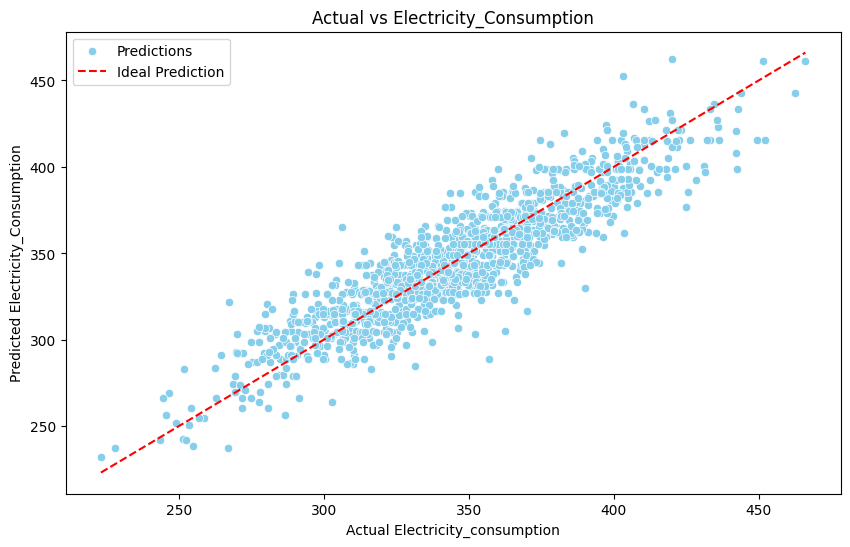

In [25]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='skyblue', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("Actual Electricity_consumption")
plt.ylabel("Predicted Electricity_Consumption")
plt.title("Actual vs Electricity_Consumption")
plt.legend()
#plt.grid(True)
plt.show()


# ✅ Final Conclusion

In this project, we successfully implemented a **Decision Tree Regression** model to predict electricity consumption based on input features. Decision trees are non-linear models that can handle complex datasets without requiring feature scaling.

## 🔍 Key Insights:

- 🔢 **Flexible Model**: Decision Tree can model non-linear relationships effectively, which is helpful for real-world data like electricity consumption.
- 📊 **Model Performance**: Using metrics like MAE, MSE, RMSE, and R² Score, the model showed a strong fit, indicating its capability in regression tasks.
- 📈 **Visual Evaluation**: The plotted predictions closely followed the actual data, confirming good model behavior.

## 💡 Why It Matters:
- Decision Trees are intuitive and interpretable — great for explaining predictions to stakeholders.
- This project adds a robust regression model to your ML portfolio and prepares the path for advanced tree-based ensembles like Random Forest and XGBoost.

> 🎯 This notebook shows a solid grasp of tree-based regression, data handling, and performance evaluation. Great work!


In [26]:
df.columns


Index(['temperature', 'humidity', 'wind_speed', 'appliance_usage',
       'time_of_day', 'season', 'electricity_consumption', 'Prediction'],
      dtype='object')